# Quantitative Research: Can gold be used as "money"
#### by Artem Grigorian

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
import pylab
from datetime import datetime

from scipy.stats import shapiro, chisquare, jarque_bera, kstest
from datetime import datetime 

In [165]:
gold = pd.read_csv('GLD.csv')
nike = pd.read_csv('NKE.csv')
microsoft = pd.read_csv('MSFT.csv')
walmart = pd.read_csv('WMT.csv')

In [166]:
gold.set_index('Date', inplace=True)
print("Gold\n")
gold

Gold



,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-04-09,126.449997,126.860001,126.230003,126.820000,126.820000,4189900
2018-04-10,127.019997,127.309998,126.669998,127.120003,127.120003,5268800
2018-04-11,128.089996,129.470001,127.779999,128.110001,128.110001,12348600
2018-04-12,127.250000,127.339996,126.470001,126.620003,126.620003,8141300
2018-04-13,127.070000,127.750000,127.029999,127.449997,127.449997,6821300
...,...,...,...,...,...,...
2023-03-31,184.110001,184.419998,182.800003,183.220001,183.220001,8000400
2023-04-03,183.850006,185.039993,183.320007,184.539993,184.539993,9206600
2023-04-04,184.720001,188.229996,184.660004,187.979996,187.979996,13765400


In [167]:
print("Nike\n")
nike

Nike



,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-04-09,68.389999,68.550003,67.150002,67.180000,63.951019,6504500
1,2018-04-10,67.809998,67.879997,66.489998,67.000000,63.779663,10098900
2,2018-04-11,66.580002,67.199997,66.519997,66.830002,63.617840,5185500
3,2018-04-12,67.070000,68.000000,67.070000,67.769997,64.512627,5145300
4,2018-04-13,68.120003,68.330002,66.980003,67.250000,64.017654,4300200
...,...,...,...,...,...,...,...
1254,2023-03-31,120.919998,122.709999,120.599998,122.639999,122.639999,5658600
1255,2023-04-03,122.500000,122.849998,120.820000,121.669998,121.669998,4838400
1256,2023-04-04,121.379997,123.949997,121.360001,123.690002,123.690002,5895300
1257,2023-04-05,123.000000,123.330002,120.559998,120.900002,120.900002,4331400


In [168]:
nike.set_index('Date', inplace=True)
nike['Log returns'] = np.log(nike['Close']/nike['Close'].shift())

In [169]:
nike['Log returns'].std()

0.020854294423876575

In [170]:
volatility_nike_dollars = nike['Log returns'].std()*252**.5

Text(0.5, 1.0, 'NKE volatility in dollars: 33.11%')

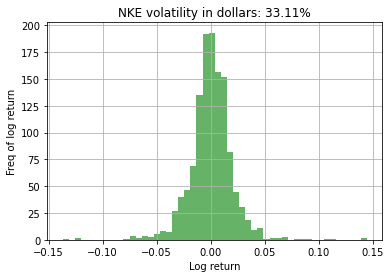

In [171]:
str_vol = str(round(volatility_nike_dollars, 4)*100)

fig, ax = plt.subplots()
nike['Log returns'].hist(ax=ax, bins=50, alpha=0.6, color='g')
ax.set_xlabel('Log return')
ax.set_ylabel('Freq of log return')
ax.set_title('NKE volatility in dollars: ' + str_vol + '%')

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

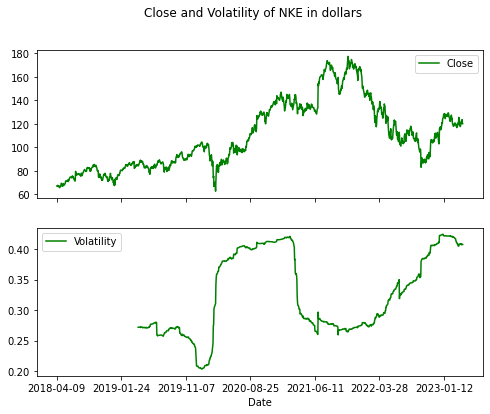

In [219]:
nike['Volatility'] = nike['Log returns'].rolling(window=252).std() * np.sqrt(252)
nike[['Close', 'Volatility']].plot(subplots=True, color='green',figsize=(8, 6), title = "Close and Volatility of NKE in dollars")

In [173]:
nike['Close in gold'] = nike['Close']/gold['Close']
nike['Close in gold']

Date
2018-04-09    0.529727
2018-04-10    0.527061
2018-04-11    0.521661
2018-04-12    0.535223
2018-04-13    0.527658
                ...   
2023-03-31    0.669359
2023-04-03    0.659315
2023-04-04    0.657996
2023-04-05    0.643667
2023-04-06    0.644646
Name: Close in gold, Length: 1259, dtype: float64

In [174]:
nike['Log returns in gold'] = np.log(nike['Close in gold']/nike['Close in gold'].shift())
nike['Log returns in gold'].std()
volatility_nike_gold = nike['Log returns in gold'].std()*252**.5

Text(0.5, 1.0, 'NKE volatility in gold: 35.72%')

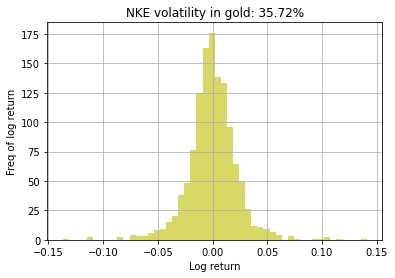

In [175]:
str_vol = str(round(volatility_nike_gold, 4)*100)

fig, ax = plt.subplots()
nike['Log returns in gold'].hist(ax=ax, bins=50, alpha=0.6, color='y')
ax.set_xlabel('Log return')
ax.set_ylabel('Freq of log return')
ax.set_title('NKE volatility in gold: ' + str_vol + '%')

<AxesSubplot:title={'center':'Volatility difference: Dollars vs Gold'}, xlabel='Date'>

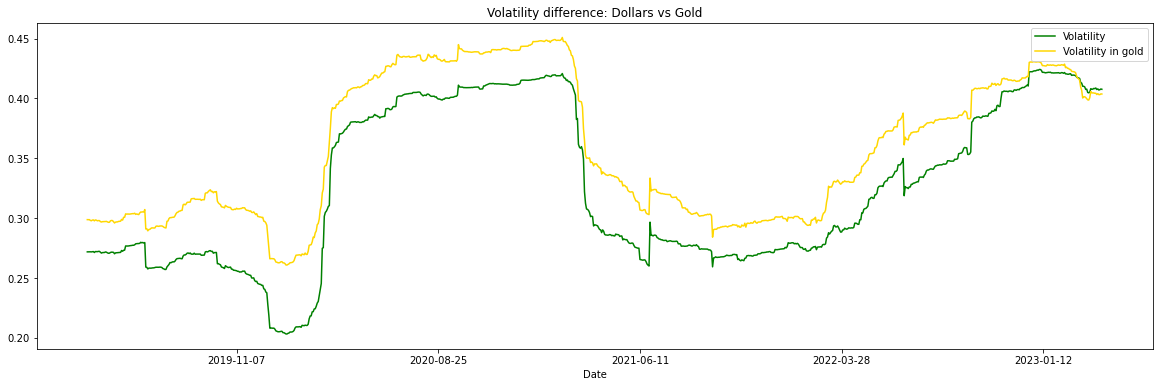

In [203]:
nike['Volatility in gold'] = nike['Log returns in gold'].rolling(window=252).std() * np.sqrt(252)
nike[['Volatility', 'Volatility in gold']].plot(color=['green','gold'] ,figsize=(20, 6), title = "Volatility difference: Dollars vs Gold")

In [178]:
print("Microsoft\n")
microsoft

Microsoft



,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-04-09,91.040001,93.169998,90.620003,90.769997,85.666412,31533900
1,2018-04-10,92.389999,93.279999,91.639999,92.879997,87.657806,26812000
2,2018-04-11,92.010002,93.290001,91.480003,91.860001,86.695137,24872100
3,2018-04-12,92.430000,94.160004,92.430000,93.580002,88.318436,26758900
4,2018-04-13,94.050003,94.180000,92.440002,93.080002,87.846550,23346100
...,...,...,...,...,...,...,...
1254,2023-03-31,283.730011,289.269989,283.000000,288.299988,288.299988,32740300
1255,2023-04-03,286.519989,288.269989,283.950012,287.230011,287.230011,24883300
1256,2023-04-04,287.230011,290.450012,285.670013,287.179993,287.179993,25824300
1257,2023-04-05,285.850006,287.149994,282.920013,284.339996,284.339996,22064800


In [179]:
microsoft.set_index('Date', inplace=True)
microsoft['Log returns'] = np.log(microsoft['Close']/microsoft['Close'].shift())

In [180]:
microsoft['Log returns'].std()

0.019503819605067613

In [181]:
volatility_microsoft_dollars = microsoft['Log returns'].std()*252**.5

Text(0.5, 1.0, 'MSFT volatility in dollars: 30.959999999999997%')

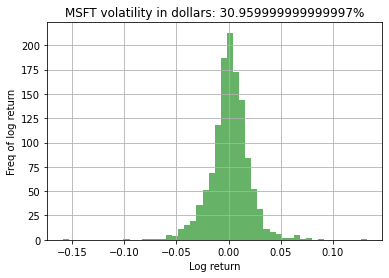

In [182]:
str_vol = str(round(volatility_microsoft_dollars, 4)*100)

fig, ax = plt.subplots()
microsoft['Log returns'].hist(ax=ax, bins=50, alpha=0.6, color='g')
ax.set_xlabel('Log return')
ax.set_ylabel('Freq of log return')
ax.set_title('MSFT volatility in dollars: ' + str_vol + '%')

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

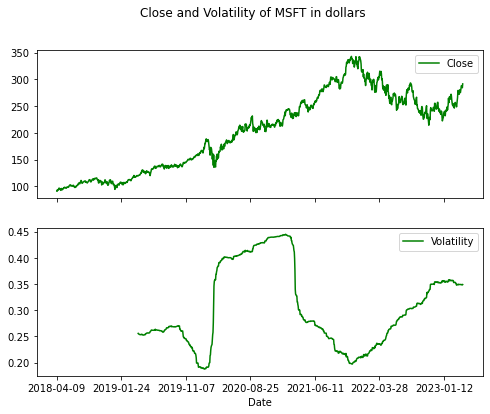

In [204]:
microsoft['Volatility'] = microsoft['Log returns'].rolling(window=252).std() * np.sqrt(252)
microsoft[['Close', 'Volatility']].plot(subplots=True, color='green',figsize=(8, 6), title = "Close and Volatility of MSFT in dollars")

In [184]:
microsoft['Close in gold'] = microsoft['Close']/gold['Close']
microsoft['Close in gold']

Date
2018-04-09    0.715739
2018-04-10    0.730648
2018-04-11    0.717040
2018-04-12    0.739062
2018-04-13    0.730326
                ...   
2023-03-31    1.573518
2023-04-03    1.556465
2023-04-04    1.527716
2023-04-05    1.513816
2023-04-06    1.563623
Name: Close in gold, Length: 1259, dtype: float64

In [185]:
microsoft['Log returns in gold'] = np.log(microsoft['Close in gold']/microsoft['Close in gold'].shift())
microsoft['Log returns in gold'].std()
volatility_microsoft_gold = microsoft['Log returns in gold'].std()*252**.5

Text(0.5, 1.0, 'MSFT volatility in gold: 33.1%')

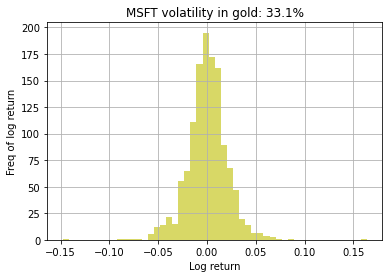

In [186]:
str_vol = str(round(volatility_microsoft_gold, 4)*100)

fig, ax = plt.subplots()
microsoft['Log returns in gold'].hist(ax=ax, bins=50, alpha=0.6, color='y')
ax.set_xlabel('Log return')
ax.set_ylabel('Freq of log return')
ax.set_title('MSFT volatility in gold: ' + str_vol + '%')

<AxesSubplot:title={'center':'Volatility difference: Dollars vs Gold'}, xlabel='Date'>

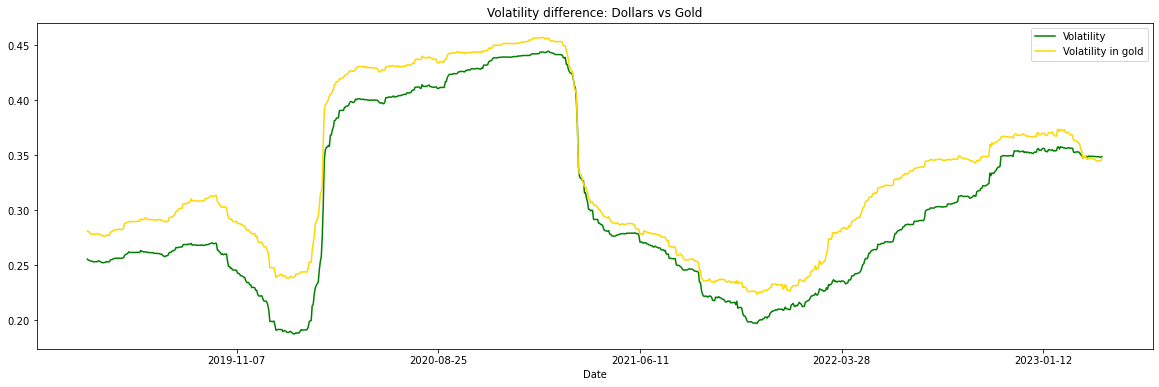

In [205]:
microsoft['Volatility in gold'] = microsoft['Log returns in gold'].rolling(window=252).std() * np.sqrt(252)
microsoft[['Volatility', 'Volatility in gold']].plot(color=['green','gold'] ,figsize=(20, 6), title = "Volatility difference: Dollars vs Gold")

In [189]:
print("Walmart\n")
walmart

Walmart



,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-04-09,86.849998,87.449997,86.239998,86.279999,78.886795,8368100
1,2018-04-10,86.839996,87.099998,85.660004,86.449997,79.042221,9127400
2,2018-04-11,86.000000,86.860001,85.800003,85.910004,78.548477,6279000
3,2018-04-12,86.190002,86.830002,85.410004,85.430000,78.109619,6856300
4,2018-04-13,85.889999,86.269997,85.190002,86.019997,78.649063,7559200
...,...,...,...,...,...,...,...
1254,2023-03-31,146.580002,148.440002,146.470001,147.449997,147.449997,6954400
1255,2023-04-03,147.729996,148.949997,147.500000,148.690002,148.690002,6588900
1256,2023-04-04,148.529999,148.789993,147.020004,147.229996,147.229996,6037900
1257,2023-04-05,147.169998,149.880005,147.139999,149.669998,149.669998,8846900


In [190]:
walmart.set_index('Date', inplace=True)
walmart['Log returns'] = np.log(walmart['Close']/walmart['Close'].shift())

In [191]:
walmart['Log returns'].std()

0.014349907770775359

In [192]:
volatility_walmart_dollars = walmart['Log returns'].std()*252**.5

Text(0.5, 1.0, 'WMT volatility in dollars: 22.78%')

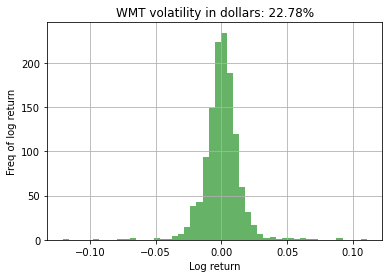

In [193]:
str_vol = str(round(volatility_walmart_dollars, 4)*100)

fig, ax = plt.subplots()
walmart['Log returns'].hist(ax=ax, bins=50, alpha=0.6, color='g')
ax.set_xlabel('Log return')
ax.set_ylabel('Freq of log return')
ax.set_title('WMT volatility in dollars: ' + str_vol + '%')

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

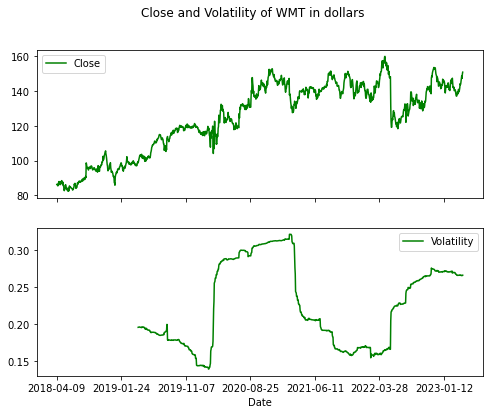

In [206]:
walmart['Volatility'] = walmart['Log returns'].rolling(window=252).std() * np.sqrt(252)
walmart[['Close', 'Volatility']].plot(subplots=True, color='green',figsize=(8, 6), title = "Close and Volatility of WMT in dollars")

In [195]:
walmart['Close in gold'] = walmart['Close']/gold['Close']
walmart['Close in gold']

Date
2018-04-09    0.680334
2018-04-10    0.680066
2018-04-11    0.670596
2018-04-12    0.674696
2018-04-13    0.674931
                ...   
2023-03-31    0.804770
2023-04-03    0.805733
2023-04-04    0.783222
2023-04-05    0.796838
2023-04-06    0.808622
Name: Close in gold, Length: 1259, dtype: float64

In [196]:
walmart['Log returns in gold'] = np.log(walmart['Close in gold']/walmart['Close in gold'].shift())
walmart['Log returns in gold'].std()
volatility_walmart_gold = walmart['Log returns in gold'].std()*252**.5

Text(0.5, 1.0, 'WMT volatility in gold: 25.81%')

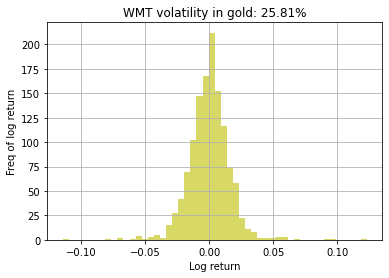

In [197]:
str_vol = str(round(volatility_walmart_gold, 4)*100)

fig, ax = plt.subplots()
walmart['Log returns in gold'].hist(ax=ax, bins=50, alpha=0.6, color='y')
ax.set_xlabel('Log return')
ax.set_ylabel('Freq of log return')
ax.set_title('WMT volatility in gold: ' + str_vol + '%')

<AxesSubplot:title={'center':'Volatility difference: Dollars vs Gold'}, xlabel='Date'>

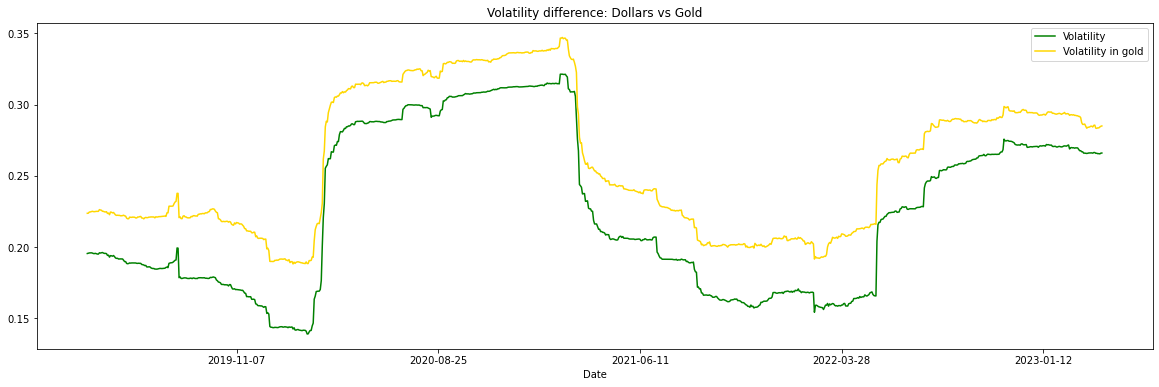

In [207]:
walmart['Volatility in gold'] = walmart['Log returns in gold'].rolling(window=252).std() * np.sqrt(252)
walmart[['Volatility', 'Volatility in gold']].plot(color=['green','gold'] ,figsize=(20, 6), title = "Volatility difference: Dollars vs Gold")

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

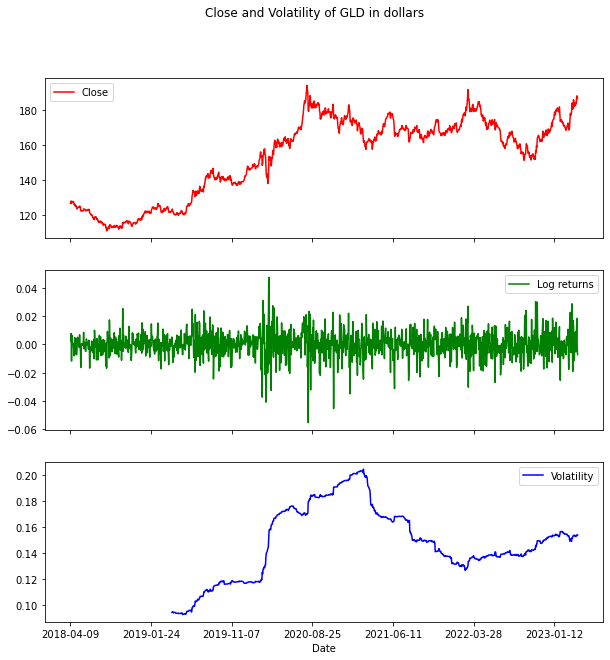

In [226]:
gold['Log returns'] = np.log(gold['Close']/gold['Close'].shift())
gold['Volatility'] = gold['Log returns'].rolling(window=252).std() * np.sqrt(252)
gold[['Close', 'Log returns', 'Volatility']].plot(subplots=True, color=['red', 'green', 'blue'],figsize=(10, 10), title = "Close and Volatility of GLD in dollars")